In [1]:
import bossdata.path
import bossdata.remote
import bossdata.spec
import fitsio
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
finder = bossdata.path.Finder()
mirror = bossdata.remote.Manager()

In [3]:
remote_path = finder.get_spec_path(plate=4053, mjd=55591, fiber=359, lite=True)
local_path = mirror.get(remote_path)

In [4]:
info = bossdata.spec.SpecFile(local_path)

In [5]:
lines = info.hdulist[3]['LINENAME','LINEWAVE','LINEZ'][:]

In [6]:
for i in range(len(lines)):
    wave = lines[i]['LINEZ'] * lines[i]['LINEWAVE'] + lines[i]['LINEWAVE']
    if lines[i]['LINEZ'] != 0:
        print(lines[i]['LINENAME'] + ' -- ' + str(wave))

Mg_II 2799    -- 4303.26474244
[O_II] 3725   -- 5727.44699154
[O_II] 3727   -- 5731.72142
[Ne_III] 3868 -- 5946.83758016
H_epsilon     -- 5978.02975207
[Ne_III] 3970 -- 6102.44776733
H_delta       -- 6304.94174179
H_gamma       -- 6671.89300014
[O_III] 4363  -- 6706.85744551
He_II 4685    -- 7202.5297263
H_beta        -- 7472.51982914
[O_III] 4959  -- 7622.52873435
[O_III] 5007  -- 7696.19538549
He_II 5411    -- 8318.23314876
[O_I] 5577    -- 8573.12308966
[N_II] 5755   -- 8845.57489942
He_I 5876     -- 9031.7119942
[O_I] 6300    -- 9684.40818178
[S_III] 6312  -- 9702.46465298
[O_I] 6363    -- 9781.9643671
[N_II] 6548   -- 10065.2152536
H_alpha       -- 10087.8838369
[N_II] 6583   -- 10119.6403024
[S_II] 6716   -- 10324.0493589
[S_II] 6730   -- 10346.1571624


In [7]:
data = info.get_valid_data()
wlen, flux, dflux = data['wavelength'][:], data['flux'][:], data['dflux'][:]

In [8]:
model = info.hdulist[1]['model'][:]

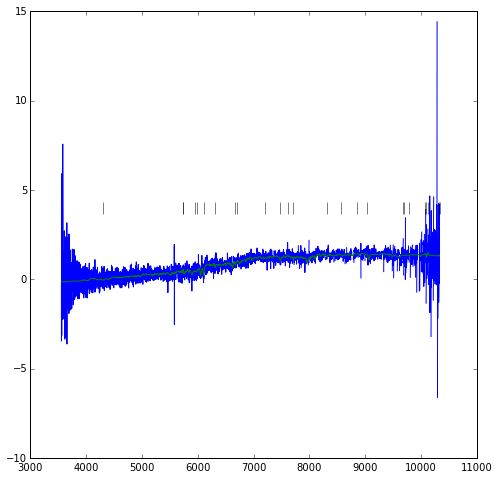

In [9]:
plt.figure(figsize = (8,8))
plt.plot(wlen,flux)
plt.plot(wlen,model)
l = []
for i in range(len(lines)):
    wave = lines[i]['LINEZ'] * lines[i]['LINEWAVE'] + lines[i]['LINEWAVE']
    if lines[i]['LINEZ'] != 0:
        l.append(wave)
plt.plot(l, 4 * np.ones(len(l)), marker = '|', color = 'black', markersize = 12, linestyle = '')
#plt.xlim(9500,11000)
plt.show()

In [10]:
Zall = fitsio.FITS('spZall-4053-55591.fits')

In [11]:
num = [352, 354, 357, 359]

In [23]:
for n in num:
    x = (n-1)*134
    print(Zall[1]['FIBERID','CLASS','SUBCLASS','Z','RCHI2'][x:x+3])

[ (352, 'GALAXY', '                     ', 0.40801990032196045, 0.9790879487991333)
 (352, 'GALAXY', '                     ', 0.41156214475631714, 1.0840147733688354)
 (352, 'QSO   ', '                     ', 5.721690654754639, 1.0939922332763672)]
[ (354, 'GALAXY', '                     ', 0.40784379839897156, 0.9981748461723328)
 (354, 'GALAXY', '                     ', 0.4122123420238495, 1.2060059309005737)
 (354, 'QSO   ', '                     ', 5.655498027801514, 1.2082403898239136)]
[ (357, 'GALAXY', 'AGN                  ', 0.5371212363243103, 1.4217875003814697)
 (357, 'QSO   ', '                     ', 0.5369772911071777, 1.5492620468139648)
 (357, 'GALAXY', '                     ', 0.17268580198287964, 1.689514398574829)]
[ (359, 'GALAXY', '                     ', 0.537486732006073, 1.0599197149276733)
 (359, 'GALAXY', '                     ', 0.5399265289306641, 1.1006745100021362)
 (359, 'QSO   ', '                     ', 6.34770393371582, 1.1356228590011597)]


In [25]:
Zall[1]['FIBERID','TFILE','TCOLUMN','NPOLY','THETA'][134*351]

array([ (352, 'spEigenGal-56436.fits   ', [0, 1, 2, 3, -1, -1, -1, -1, -1, -1], 3, [0.01201134268194437, 0.03990386798977852, 0.18553945422172546, -0.01229883823543787, -1.3839863538742065, 4.12687349319458, -3.430598735809326, 0.0, 0.0, 0.0])], 
      dtype=[('FIBERID', '>i4'), ('TFILE', 'S24'), ('TCOLUMN', '>i4', (10,)), ('NPOLY', '>i4'), ('THETA', '>f4', (10,))])